In [1]:
import sys

In [2]:
sys.path.append('/Users/Pradap/Documents/Research/Python-Package/enrique/')

In [3]:
import magellan as mg

In [4]:
mg.init_jvm()


True

In [5]:
A = mg.load_dataset('table_A')
B = mg.load_dataset('table_B')

In [6]:
ab = mg.AttrEquivalenceBlocker()
C = ab.block_tables(A, B, 'zipcode', 'zipcode', l_output_attrs=['name', 'hourly_wage', 'zipcode'],
                    r_output_attrs=['name', 'hourly_wage', 'zipcode'])


In [7]:
S = mg.sample_one_table(C, 10)

In [8]:
L = mg.label(S, 'label')

In [9]:
feat_table = mg.get_features_for_blocking(A, B)

In [10]:
S_prime = mg.extract_feat_vecs(L, attrs_after='label', feat_table=feat_table)

In [11]:
dt = mg.DTMatcher(random_state=80)

In [12]:
dt.fit(table=S_prime, exclude_attrs=['_id', 'ltable.ID', 'rtable.ID', 'label'], target_attr='label')

['ID_ID_lev', 'ID_ID_jar', 'ID_ID_jwn', 'ID_ID_sdx', 'ID_ID_exm', 'ID_ID_jac_qgm_3_qgm_3', 'name_name_jac_qgm_3_qgm_3', 'name_name_cos_dlm_dc0_dlm_dc0', 'name_name_jac_dlm_dc0_dlm_dc0', 'name_name_mel', 'name_name_nmw', 'name_name_sw', 'name_name_swg', 'birth_year_birth_year_exm', 'birth_year_birth_year_anm', 'birth_year_birth_year_lev', 'hourly_wage_hourly_wage_exm', 'hourly_wage_hourly_wage_anm', 'hourly_wage_hourly_wage_lev', 'zipcode_zipcode_exm', 'zipcode_zipcode_anm', 'zipcode_zipcode_lev']
After fitting


In [13]:
from magellan.debug.decisiontree import visualize_tree

In [14]:
visualize_tree(dt, S_prime.columns, ['_id', 'ltable.ID', 'rtable.ID', 'label'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


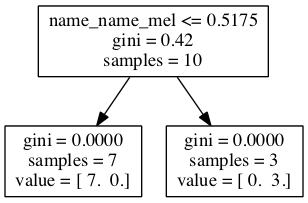

In [15]:
from IPython.display import Image
Image(filename='dt_.png') 

In [16]:
mg.debug_dt(dt, A.ix[2], B.ix[1], feat_table, S_prime.columns, ['_id', 'ltable.ID', 'rtable.ID', 'label'])

Condition name_name_mel <= 0.51748251915 FAILED (  value : 0.781818181818)
Tuples match status : True


In [17]:
A.ix[2]

ID                                         a3
name                           William Bridge
birth_year                               1986
hourly_wage                                32
address        3131 Webster St, San Francisco
zipcode                                 94107
Name: 2, dtype: object

In [18]:
B.ix[1]

ID                                         b2
name                              Bill Bridge
birth_year                               1986
hourly_wage                                32
address        3131 Webster St, San Francisco
zipcode                                 94107
Name: 1, dtype: object